<center>
  <img src="https://nit-edu.net/wp-content/uploads/2021/11/logo-1.png" alt="Numidia Institute of Technology" width="200">
</center>
<center><h2><strong>Can Stats Predict if a Pokémon is Legendary?</strong></h2></center>


**Welcome, Pokémon trainer!**

Our goal is to use **descriptive statistics** to see if we can find patterns that distinguish Legendary Pokémon from others.  
If we find strong patterns, these stats could help us **"predict"** if a Pokémon is Legendary!

---

### Presented by:
- **LOUNI** Anya 
<img src="https://raw.githubusercontent.com/PokeAPI/sprites/master/sprites/pokemon/versions/generation-v/black-white/animated/420.gif" width="35">

### Supervised by:
 - **Dr. TAOUSSI B.**

> *Presented as part of our coursework at*  
> **Numidia Institute of Technology**


<center><img src="https://raw.githubusercontent.com/PokeAPI/sprites/master/sprites/pokemon/versions/generation-v/black-white/animated/130.gif" alt="Gyarados" width="150"></center>


**Library Imports and Setup:**

Before working with our dataset, we first import all the essential libraries:

 - Pandas and NumPy for data handling and manipulation.

 - Matplotlib and Seaborn for creating beautiful visualizations.

 - IPython.display tools to show images and HTML directly in the notebook.

Let’s get everything ready to explore the Pokédex!

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display, HTML


pastel_palette = ["#FFB6C1", "#FFDAB9", "#E6E6FA", "#B0E0E6", "#D8BFD8", "#FFFACD"]
sns.set_palette(pastel_palette)
plt.style.use('seaborn-v0_8-whitegrid') 

# For Pokémon sprites
pokemon_sprite_url_template = "https://raw.githubusercontent.com/PokeAPI/sprites/master/sprites/pokemon/{}.png"

print("Libraries and settings loaded!")

Libraries and settings loaded!


**Data Cleaning and Quick Preview:**

In this step, we load our Pokémon dataset and perform initial cleaning:
 - Replaced the # symbol in the column name with ID for clarity.

 - Filled missing values in the Type_2 column with "None" to indicate single-type Pokémon.

 - Checked for any remaining missing values in the dataset.

 - Displayed the first few entries in the Pokédex to get a feel for the data.

Let’s take a look!

In [8]:
# Load the dataset
df = pd.read_csv('Pokemon.csv')

# Clean column names: replace '#' with 'ID'
df.columns = df.columns.str.replace('#', 'ID', regex=False)

# Fill missing values in 'Type_2' with 'None' for single-type Pokémon
df['Type 2'].fillna('None', inplace=True)

# Check for any remaining missing values
print("Missing values per column after initial cleaning:")
print(df.isnull().sum())

# Preview the cleaned data
print("\nHere's a sneak peek at our Pokédex:")
display(df.head())

# Show dataset dimensions
print(f"\nOur dataset has {df.shape[0]} Pokémon and {df.shape[1]} features.")

# Display a random Pokémon sprite using its ID
random_id = df.sample(1)['ID'].iloc[0]
display(HTML(f"""
    <div style="text-align:center;">
        <h4>Say hi to Pokémon ID: {random_id}!</h4>
        <img src="{pokemon_sprite_url_template.format(random_id)}" width="150" height="150">
    </div>
"""))


Missing values per column after initial cleaning:
ID            0
Name          0
Type 1        0
Type 2        0
Total         0
HP            0
Attack        0
Defense       0
Sp. Atk       0
Sp. Def       0
Speed         0
Generation    0
Legendary     0
dtype: int64

Here's a sneak peek at our Pokédex:


C:\Users\10032\AppData\Local\Temp\ipykernel_28320\1612439812.py:8: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Type 2'].fillna('None', inplace=True)


,ID,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,None,309,39,52,43,60,50,65,1,False



Our dataset has 800 Pokémon and 13 features.


Number of Legendary vs. Non-Legendary Pokémon:
Legendary
False    735
True      65
Name: count, dtype: int64


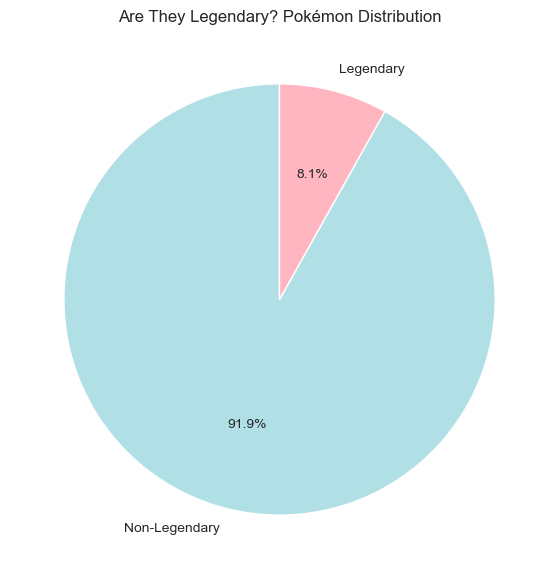

In [12]:
# Count the number of Legendary and Non-Legendary Pokémon
legendary_counts = df['Legendary'].value_counts()

# Print out the counts for each category
print("Number of Legendary vs. Non-Legendary Pokémon:")
print(legendary_counts)

# Create a pie chart to visualize the proportion of Legendary Pokémon
plt.figure(figsize=(7, 7))  # Set the size of the plot

plt.pie(
    legendary_counts,                          # Values to plot
    labels=['Non-Legendary', 'Legendary'],     # Labels for the slices
    autopct='%1.1f%%',                         # Show percentages with 1 decimal
    startangle=90,                             # Start the pie chart from the top
    colors=[pastel_palette[3], pastel_palette[0]],  # Use custom pastel colors
    wedgeprops={'edgecolor': 'white'}          # White border between slices for clarity
)

# Add a title to the chart
plt.title('Are They Legendary? Pokémon Distribution')

# Display the chart
plt.show()


**Comparing Stats: Legendary vs. Non-Legendary Pokémon:**

In this section, we dive into the actual power stats of Pokémon to understand the differences between Legendary and Non-Legendary types.

 - We focus on numerical attributes like HP, Attack, Defense, Speed, and more.

 - We generate descriptive statistics (mean, median, etc.) separately for each group.

 - A comparison table is created to summarize and compare key differences.

This helps us understand whether Legendary Pokémon are significantly stronger (spoiler: they are).

Let’s see the stats in action!

In [ ]:
# Select numerical columns that represent Pokémon battle stats
numerical_stats_cols = ['Total', 'HP', 'Attack', 'Defense', 'Sp. Atk', 'Sp. Def', 'Speed']

# Calculate descriptive statistics (like mean, std, min, etc.) for Legendary Pokémon
legendary_pokemon_stats_desc = df[df['Legendary'] == True][numerical_stats_cols].describe().round(2)
print("\n--- Descriptive Stats for LEGENDARY Pokémon ---")
display(legendary_pokemon_stats_desc)

# Do the same for Non-Legendary Pokémon
non_legendary_pokemon_stats_desc = df[df['Legendary'] == False][numerical_stats_cols].describe().round(2)
print("\n--- Descriptive Stats for NON-LEGENDARY Pokémon ---")
display(non_legendary_pokemon_stats_desc)

# Extract mean and median values to compare more directly
mean_non_legendary = non_legendary_pokemon_stats_desc.loc['mean']
mean_legendary = legendary_pokemon_stats_desc.loc['mean']
median_non_legendary = non_legendary_pokemon_stats_desc.loc['50%']  # 50% percentile is the median
median_legendary = legendary_pokemon_stats_desc.loc['50%']

# Combine the values into a single comparison DataFrame
comparison_df = pd.DataFrame({
    'Mean (Non-Legendary)': mean_non_legendary,
    'Mean (Legendary)': mean_legendary,
    'Median (Non-Legendary)': median_non_legendary,
    'Median (Legendary)': median_legendary
})

# Display the summarized comparison table
print("\n--- Mean and Median Comparison ---")
display(comparison_df)

# We'll visualize these differences in a plot next!



--- Descriptive Stats for LEGENDARY Pokémon ---


,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed
count,65.00,65.00,65.00,65.00,65.00,65.00,65.00
mean,637.38,92.74,116.68,99.66,122.18,105.94,100.18
std,60.94,21.72,30.35,28.26,31.10,28.83,22.95
min,580.00,50.00,50.00,20.00,50.00,20.00,50.00
25%,580.00,80.00,100.00,90.00,100.00,90.00,90.00
50%,600.00,91.00,110.00,100.00,120.00,100.00,100.00
75%,680.00,105.00,131.00,115.00,150.00,120.00,110.00
max,780.00,150.00,190.00,200.00,194.00,200.00,180.00



--- Descriptive Stats for NON-LEGENDARY Pokémon ---


,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed
count,735.00,735.00,735.00,735.00,735.00,735.00,735.00
mean,417.21,67.18,75.67,71.56,68.45,68.89,65.46
std,106.76,24.81,30.49,30.41,29.09,25.67,27.84
min,180.00,1.00,5.00,5.00,10.00,20.00,5.00
25%,324.00,50.00,54.50,50.00,45.00,50.00,45.00
50%,425.00,65.00,72.00,66.00,65.00,65.00,64.00
75%,498.00,79.50,95.00,85.00,85.00,85.00,85.00
max,700.00,255.00,185.00,230.00,175.00,230.00,160.00



--- Mean and Median Comparison ---


,Mean (Non-Legendary),Mean (Legendary),Median (Non-Legendary),Median (Legendary)
Total,417.21,637.38,425.0,600.0
HP,67.18,92.74,65.0,91.0
Attack,75.67,116.68,72.0,110.0
Defense,71.56,99.66,66.0,100.0
Sp. Atk,68.45,122.18,65.0,120.0
Sp. Def,68.89,105.94,65.0,100.0
Speed,65.46,100.18,64.0,100.0


**Visualizing Stat Differences:**

In this section, we bring our comparisons to life using visualizations:

 - First, we plot the distribution of Total stats to see how powerful Legendary Pokémon really are compared to Non-Legendaries.

 - Then, we use box plots to compare key stats like Attack, Special Attack, Speed, and Total across the two groups.
 
 These plots help us quickly see patterns like higher medians, outliers, and spread.

> The distribution plot tells us about the overall power gap between Legendary and Non-Legendary Pokémon.

> The box plots break down that power into specific stats, showing where exactly Legendary Pokémon tend to outperform others, and how consistent those differences are.

Both are essential to get a full picture of the differences and similarities between these two Pokémon groups!

Let’s visualize the power differences!

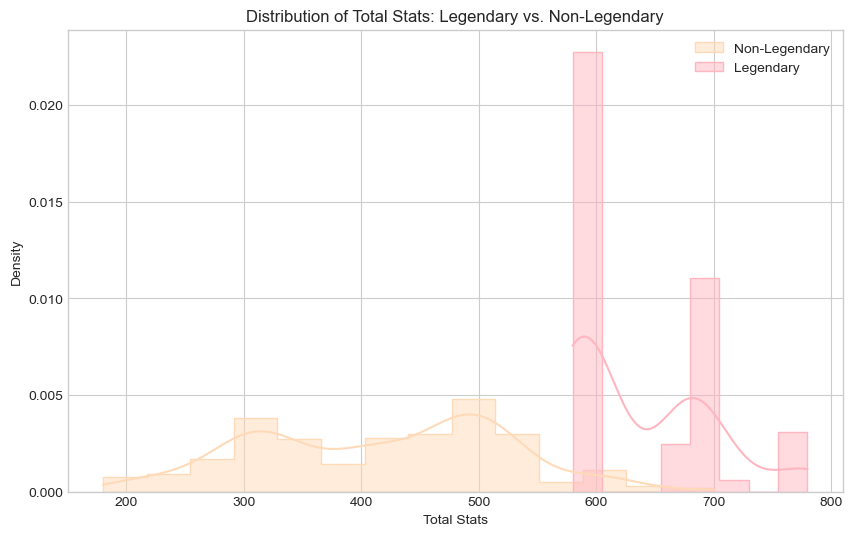

C:\Users\10032\AppData\Local\Temp\ipykernel_21664\918277903.py:36: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Legendary', y=stat, data=df,
C:\Users\10032\AppData\Local\Temp\ipykernel_21664\918277903.py:36: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Legendary', y=stat, data=df,
C:\Users\10032\AppData\Local\Temp\ipykernel_21664\918277903.py:36: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Legendary', y=stat, data=df,
C:\Users\10032\AppData\Local\Temp\ipykernel_21664\918277903.py:36: FutureWarning: 

Passing `palette` without as

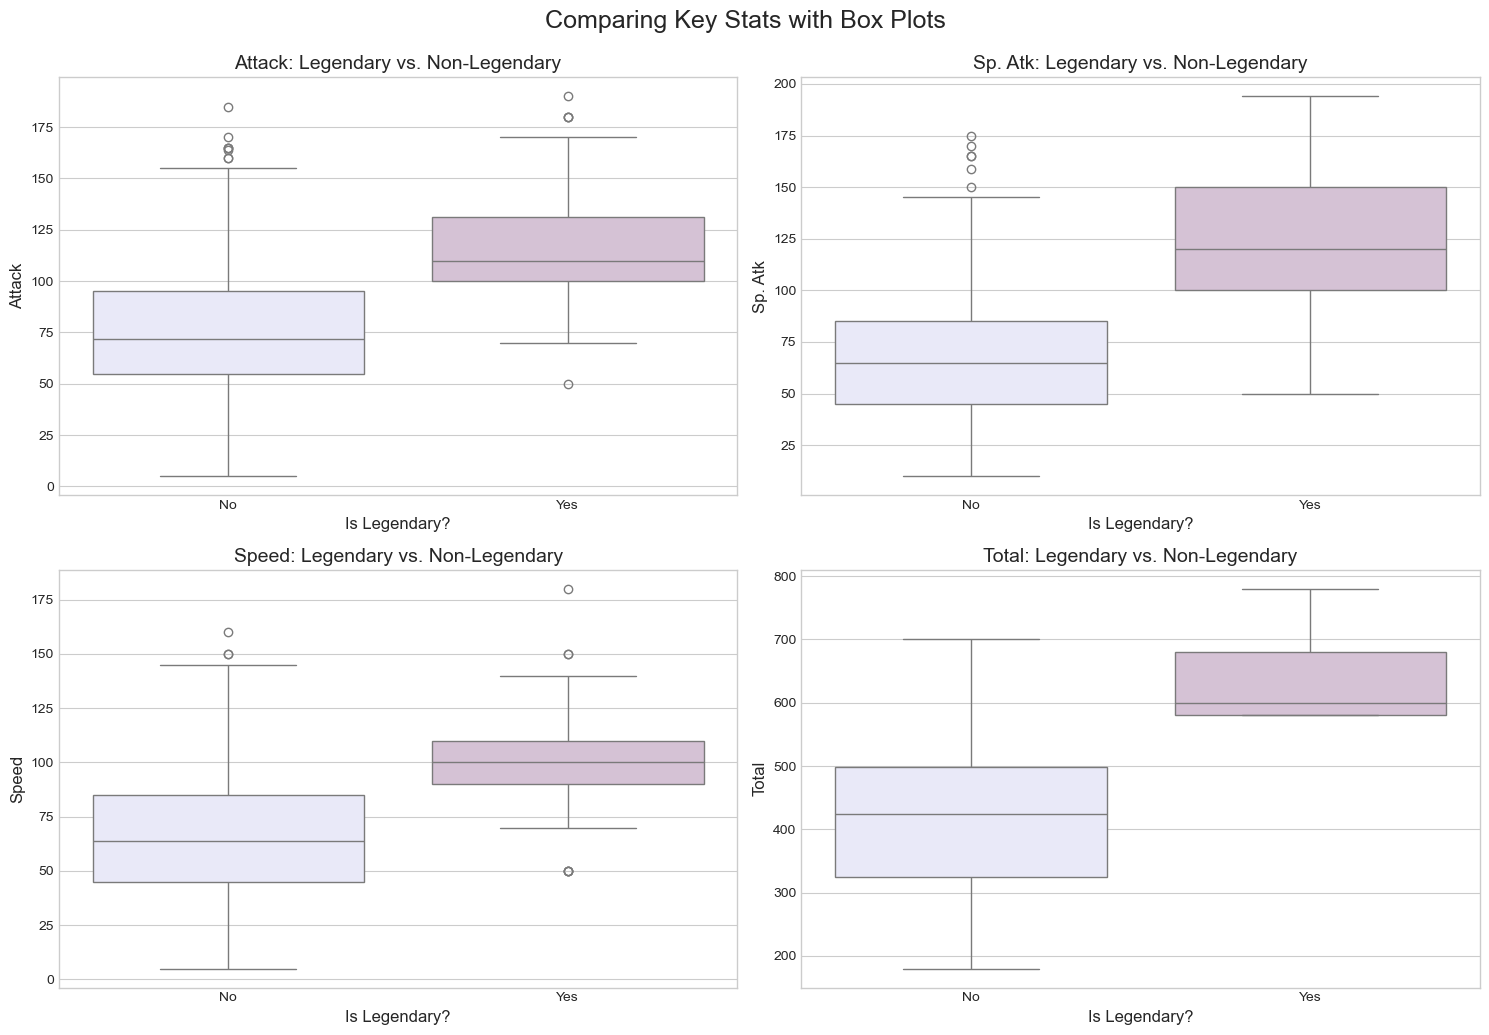

In [ ]:
# Plot the distribution of 'Total' stats for Legendary and Non-Legendary Pokémon
plt.figure(figsize=(10, 6))

# Histogram for Non-Legendary Pokémon
sns.histplot(df[df['Legendary'] == False]['Total'], 
             color=pastel_palette[1], 
             label='Non-Legendary', 
             kde=True,             # Add kernel density estimate line
             stat="density",       # Normalize height
             element="step")       # Step-style plot for clarity

# Histogram for Legendary Pokémon
sns.histplot(df[df['Legendary'] == True]['Total'], 
             color=pastel_palette[0], 
             label='Legendary', 
             kde=True, 
             stat="density", 
             element="step")

# Plot formatting
plt.title('Distribution of Total Stats: Legendary vs. Non-Legendary')
plt.xlabel('Total Stats')
plt.ylabel('Density')
plt.legend()
plt.show()


# Box plots to compare key stats
key_stats_for_boxplot = ['Attack', 'Sp. Atk', 'Speed', 'Total']

plt.figure(figsize=(15, 10))  # Create a larger figure to fit subplots

# Loop through each stat and create a subplot
for i, stat in enumerate(key_stats_for_boxplot):
    plt.subplot(2, 2, i + 1)  # Create a 2x2 grid of subplots
    sns.boxplot(x='Legendary', y=stat, data=df, 
                palette=[pastel_palette[2], pastel_palette[4]])  # Custom colors

    plt.title(f'{stat}: Legendary vs. Non-Legendary', fontsize=14)
    plt.xlabel('Is Legendary?', fontsize=12)
    plt.ylabel(stat, fontsize=12)
    plt.xticks(ticks=[False, True], labels=['No', 'Yes'])  # Boolean to label mapping

# Improve layout and add a main title
plt.tight_layout()
plt.suptitle('Comparing Key Stats with Box Plots', fontsize=18, y=1.03)
plt.show()


**Predicting Legendary Pokémon Using a Simple Threshold Rule:**

In this section, we use a straightforward rule to predict if a Pokémon is Legendary:

> If its Total stat is higher than the 10th percentile of all Legendary Pokémon's Total stats, then it's predicted to be Legendary.

We'll evaluate:

 - The threshold value used

 - The accuracy of this rule

 - A sample of correct and incorrect predictions

 - Examples of Pokémon that are misclassified (False Positives & False Negatives)

In [22]:
# Get 'Total' stats of all Legendary Pokémon
legendary_totals = df[df['Legendary'] == True]['Total']

# Calculate the 10th percentile as the threshold
threshold = legendary_totals.quantile(0.10)

print(f"Chosen 'Total' stat threshold for prediction: {threshold:.0f}")

# Apply prediction rule: predict Legendary if Total stat is above threshold
df['Predicted_Legendary'] = df['Total'] > threshold

# Calculate accuracy of this simple prediction
correct_predictions = (df['Predicted_Legendary'] == df['Legendary']).sum()
total_pokemon = len(df)
accuracy = (correct_predictions / total_pokemon) * 100

print(f"\nUsing 'Total > {threshold:.0f}' as our prediction rule:")
print(f"We correctly classified {correct_predictions} out of {total_pokemon} Pokémon.")
print(f"Simple Accuracy: {accuracy:.2f}%")

# Show a random sample of 10 Pokémon with actual vs predicted values
print("\n--- Example of Predictions vs Actual (Random Sample) ---")
display(df[['ID','Name', 'Total', 'Legendary', 'Predicted_Legendary']].sample(10))

# Confusion matrix components
tp = df[(df['Predicted_Legendary'] == True) & (df['Legendary'] == True)].shape[0]  # True Positives
fp = df[(df['Predicted_Legendary'] == True) & (df['Legendary'] == False)].shape[0] # False Positives
tn = df[(df['Predicted_Legendary'] == False) & (df['Legendary'] == False)].shape[0]# True Negatives
fn = df[(df['Predicted_Legendary'] == False) & (df['Legendary'] == True)].shape[0] # False Negatives

# Print breakdown
print(f"\n--- Breakdown of our simple prediction rule ---")
print(f"  Guessed Legendary & WAS Legendary (True Positives): {tp}")
print(f"  Guessed Legendary & was NOT (False Positives): {fp} (e.g., Slaking, Pseudo-Legendaries)")
print(f"  Guessed Non-Legendary & was NOT (True Negatives): {tn}")
print(f"  Guessed Non-Legendary & WAS Legendary (False Negatives): {fn} (e.g., Phione, some mythicals with lower totals)")

# Show 2 strong non-legendaries misclassified as Legendary (False Positives)
display(HTML("<h3 style='text-align:center'>Strong Non-Legendaries we might misclassify as Legendary (False Positives):</h3>"))
false_positives_df = df[(df['Predicted_Legendary'] == True) & (df['Legendary'] == False)]

if not false_positives_df.empty:
    for index, row in false_positives_df.sort_values(by='Total', ascending=False).head(min(2, len(false_positives_df))).iterrows():
        display(HTML(f"""
            <div style='text-align:center'>
                <b>{row['Name']}</b><br>
                (ID: {row['ID']}, Total: {row['Total']})<br>
                <i>Predicted Legendary, Actually Non-Legendary</i><br>
                <img src='{pokemon_sprite_url_template.format(row['ID'])}' width='100'>
            </div>
        """))
else:
    print("No False Positives with this threshold!")


# Show 2 legendaries missed by the rule (False Negatives)
display(HTML("<h3 style='text-align:center'>Legendaries we might miss with this rule (False Negatives):</h3>"))
false_negatives_df = df[(df['Predicted_Legendary'] == False) & (df['Legendary'] == True)]

if not false_negatives_df.empty:
    for index, row in false_negatives_df.sort_values(by='Total', ascending=True).head(min(2, len(false_negatives_df))).iterrows():
        display(HTML(f"""
            <div style='text-align:center'>
                <b>{row['Name']}</b><br>
                (ID: {row['ID']}, Total: {row['Total']})<br>
                <i>Predicted Non-Legendary, Actually Legendary</i><br>
                <img src='{pokemon_sprite_url_template.format(row['ID'])}' width='100'>
            </div>
        """))
else:
    print("No False Negatives with this threshold!")



Chosen 'Total' stat threshold for prediction: 580

Using 'Total > 580' as our prediction rule:
We correctly classified 737 out of 800 Pokémon.
Simple Accuracy: 92.12%

--- Example of Predictions vs Actual (Random Sample) ---


,ID,Name,Total,Legendary,Predicted_Legendary
594,534,Conkeldurr,505,False,False
628,567,Archeops,567,False,False
6,6,Charizard,534,False,False
763,693,Clawitzer,500,False,False
491,443,Gible,300,False,False
688,627,Rufflet,350,False,False
148,137,Porygon,395,False,False
389,356,Dusclops,455,False,False
507,457,Lumineon,460,False,False
458,413,WormadamPlant Cloak,424,False,False



--- Breakdown of our simple prediction rule ---
  Guessed Legendary & WAS Legendary (True Positives): 46
  Guessed Legendary & was NOT (False Positives): 44 (e.g., Slaking, Pseudo-Legendaries)
  Guessed Non-Legendary & was NOT (True Negatives): 691
  Guessed Non-Legendary & WAS Legendary (False Negatives): 19 (e.g., Phione, some mythicals with lower totals)


## <center>**How Descriptive Statistics Powered Our Pokémon Predictions**</center>

Our journey through Pokémon stats has shown us something important:

- **Descriptive statistics are super useful!** By looking at means, medians, distributions (histograms), and spreads (box plots), we found clear, quantifiable differences between Legendary and Non-Legendary Pokémon.
- **Legendary Pokémon are generally much stronger statistically.** Their 'Total' stats, as well as individual combat stats, are consistently higher. This was evident from both the summary tables and the visualizations.
- **Prediction is possible and informed by descriptive stats!** Because of these statistical differences, we created a simple rule: `"Total" stat > threshold`, where the threshold was based on the 10th percentile of Legendary Pokémon. This gave us a surprisingly strong baseline rule, with an accuracy around **92.12%**.

But beyond accuracy, this project had a deeper purpose.

---

### Descriptive Stats as a Modeling Tool

This wasn’t about building the most complex model; it was about showing how **basic data understanding** can drive predictive insights.

Instead of guessing a threshold or throwing data into a black-box model, we used descriptive statistics to **observe real differences**:

- We looked at the distribution of `'Total'` among Legendaries.
- Chose a meaningful, data-driven cutoff (the 10th percentile).
- Engineered a simple rule-based feature: `'Predicted_Legendary'`.

Then, using our new column, we analyzed **false positives** and **false negatives**. Again relying on data visualization and context, not just metrics.

This approach grounded everything in **observable patterns**, making the prediction explainable and transparent.

---

### Limitations and What's Next

Of course, our rule isn’t perfect. Some strong Non-Legendary Pokémon (like pseudo-legendaries or Slaking) were misclassified as Legendary. And a few Legendaries fell below our threshold. But these exceptions don’t weaken our insight; they highlight the next step: using **machine learning models** to combine multiple stats and find more nuanced patterns.

---
**Thanks for exploring with us, trainer!**

<center><img src="https://raw.githubusercontent.com/PokeAPI/sprites/master/sprites/pokemon/versions/generation-v/black-white/animated/133.gif" alt="Eevee" width="75"> <img src="https://raw.githubusercontent.com/PokeAPI/sprites/master/sprites/pokemon/versions/generation-v/black-white/animated/162.gif" alt="Furret" width="75"> <img src="https://raw.githubusercontent.com/PokeAPI/sprites/master/sprites/pokemon/versions/generation-v/black-white/animated/216.gif" alt="Tediursa" width="65"></center>